In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, metrics, model_selection
from pickle import dump, load

from helpers import *


In [2]:
def show_result(X,y_true,y_pred,label_cell):
    print("Accuracy: %.3f" % (metrics.accuracy_score(y_true, y_pred)))
    print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_true, y_pred)))
    print("F1: %.3f" % (metrics.f1_score(y_true, y_pred)))
    print("AUC: %.3f" % (metrics.roc_auc_score(y_true, y_pred)))
    #pl = sns.scatterplot(data=X_file, x="B530-H", y="B572-H", hue=y_pred_file)
    
    plt.figure(figsize = (12,6))

    # Create four subplots (a 2x2 matrix of plots) with distribution plots
    plt.subplot(221)
    g1 = sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y_true)
    g1.set_title("True labeling", fontsize=16)

    plt.subplot(222)
    g2 = sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y_pred)
    g2.set_title('Prediction', fontsize=16)


    plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

    plt.show()
    
    #Show number of cells
    true_clusters_list = collections.Counter(y_true).most_common()
    pred_clusters_list = collections.Counter(y_pred).most_common()
    true_d = dict(true_clusters_list)
    pred_d = dict(pred_clusters_list)
    print("number of real cells: %d, and number of predicted cells: %d" % (true_d[label_cell],pred_d[label_cell]))
    print(collections.Counter(y_true).most_common())
    print(collections.Counter(y_pred).most_common())


In [3]:
def merge_files(files):
    init = files[0]
    files_ = files[1::]
    
    X,y = preprocess(init,columns)
    for file in files_:
        X1,y1 = preprocess(file,columns)
        X = X.append(X1, ignore_index = True)
        y = y.append(y1, ignore_index = True)
    return X,y

In [4]:
def powerset(s,res):
    x = len(s)
    for i in range(1,1 << x):
        res.append([s[j] for j in range(x) if (i & (1 << j))])

In [5]:
all_files = [
         '../labeled_dataset/GL53_UP_1A.csv',
         '../labeled_dataset/GL53_UP_2A.csv',
         '../labeled_dataset/GL53_UP_3A.csv',
         '../labeled_dataset/GL57_DN_3A.csv',
         '../labeled_dataset/GL57_DN_2A.csv',
         '../labeled_dataset/GL58_UP_1A.csv',
         '../labeled_dataset/GL58_UP_2A.csv',
         '../labeled_dataset/GL58_UP_3A.csv',
         '../labeled_dataset/GL59_DN_1A.csv',
         '../labeled_dataset/GL59_DN_2A.csv',
         '../labeled_dataset/GL59_DN_3A.csv']


In [6]:
train_files = ['../labeled_dataset/GL53_UP_1A.csv', '../labeled_dataset/GL53_UP_2A.csv', '../labeled_dataset/GL53_UP_3A.csv', '../labeled_dataset/GL57_DN_2A.csv', '../labeled_dataset/GL59_DN_1A.csv']
test_files = list(set(all_files) - set(train_files))
columns=['B530-H', 'B675-H','B572-H','Width']

X,y = merge_files(train_files)  



In [7]:
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

kfold_cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

X.shape

(24870, 4)

### Decision Tree

In [8]:
model = DecisionTreeClassifier(random_state=0)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.890 (0.009)
Balanced Accuracy: 0.888 (0.010)
F1: 0.872 (0.010)
AUC: 0.888 (0.010)
Accuracy: 0.885
Balanced Accuracy: 0.883
F1: 0.866
AUC: 0.883


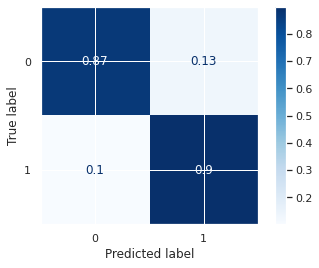

In [9]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

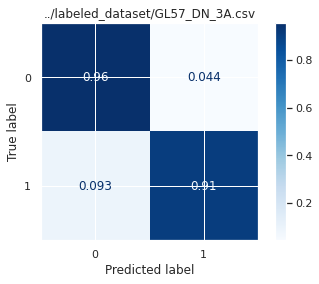

Accuracy: 0.924
Balanced Accuracy: 0.932
F1: 0.895
AUC: 0.932


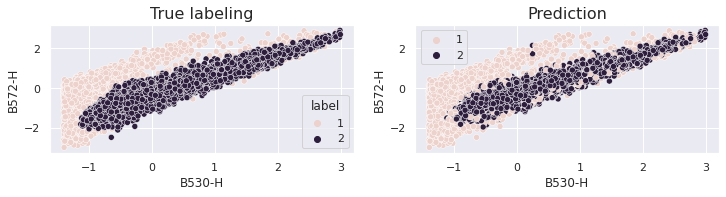

number of real cells: 5267, and number of predicted cells: 4897
[(2, 5267), (1, 2697)]
[(2, 4897), (1, 3067)]
 


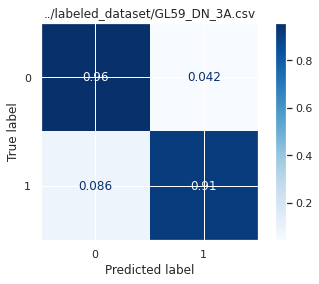

Accuracy: 0.929
Balanced Accuracy: 0.936
F1: 0.902
AUC: 0.936


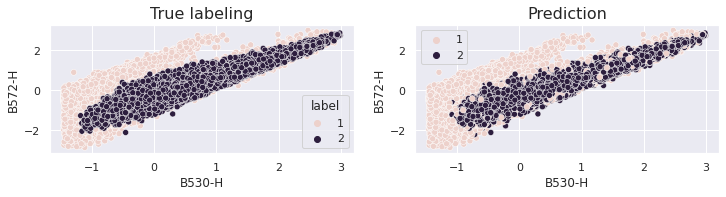

number of real cells: 8881, and number of predicted cells: 8308
[(2, 8881), (1, 4543)]
[(2, 8308), (1, 5116)]
 


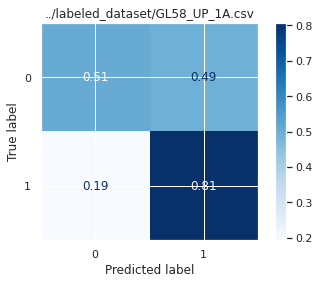

Accuracy: 0.626
Balanced Accuracy: 0.656
F1: 0.619
AUC: 0.656


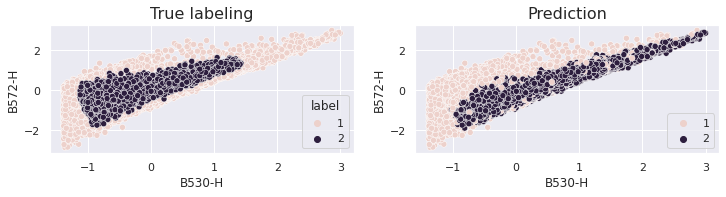

number of real cells: 4125, and number of predicted cells: 6381
[(1, 6171), (2, 4125)]
[(2, 6381), (1, 3915)]
 


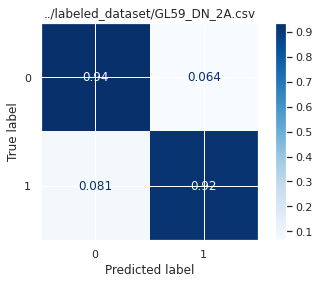

Accuracy: 0.925
Balanced Accuracy: 0.928
F1: 0.895
AUC: 0.928


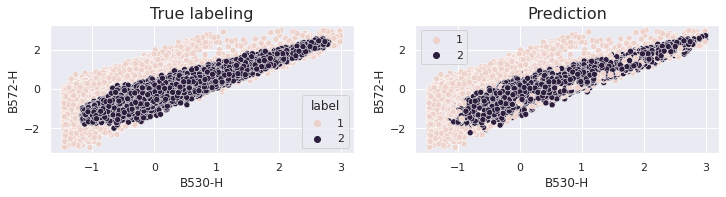

number of real cells: 9657, and number of predicted cells: 9200
[(2, 9657), (1, 5033)]
[(2, 9200), (1, 5490)]
 


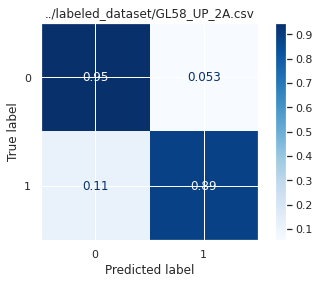

Accuracy: 0.909
Balanced Accuracy: 0.917
F1: 0.879
AUC: 0.917


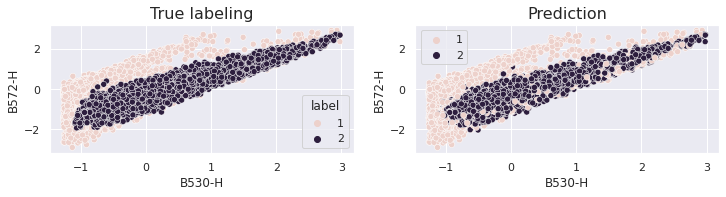

number of real cells: 4441, and number of predicted cells: 4069
[(2, 4441), (1, 2403)]
[(2, 4069), (1, 2775)]
 


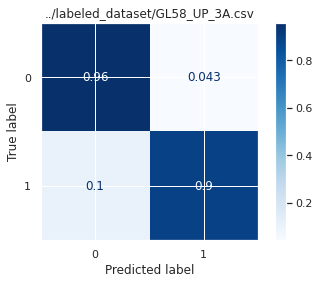

Accuracy: 0.915
Balanced Accuracy: 0.926
F1: 0.877
AUC: 0.926


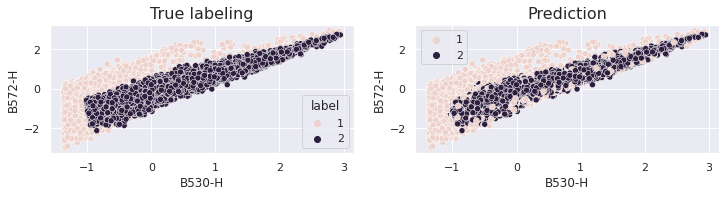

number of real cells: 5448, and number of predicted cells: 4988
[(2, 5448), (1, 2523)]
[(2, 4988), (1, 2983)]
 


In [10]:
for file in test_files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    plt.show()
    show_result(X_file,y_file,y_pred_file,label_cell=2)
    print(" ")
    

### Random Forest

In [11]:
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))


# Example for a training-test split
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.919 (0.008)
Balanced Accuracy: 0.910 (0.010)
F1: 0.900 (0.011)
AUC: 0.971 (0.005)
Accuracy: 0.921
Balanced Accuracy: 0.913
F1: 0.902
AUC: 0.913


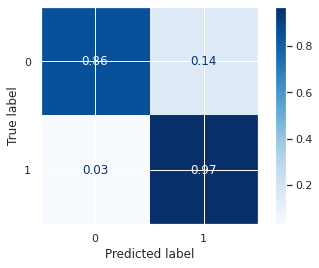

In [12]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');

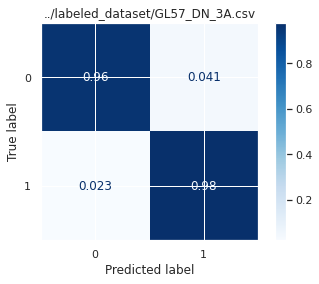

Accuracy: 0.971
Balanced Accuracy: 0.968
F1: 0.957
AUC: 0.968


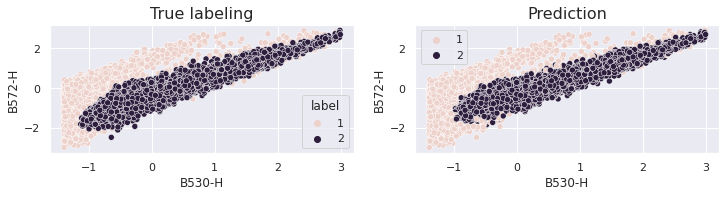

number of real cells: 5267, and number of predicted cells: 5257
[(2, 5267), (1, 2697)]
[(2, 5257), (1, 2707)]


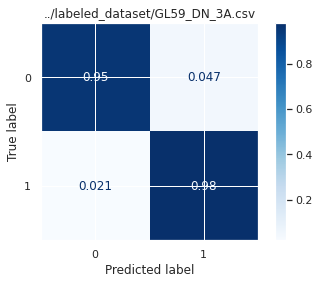

Accuracy: 0.970
Balanced Accuracy: 0.966
F1: 0.956
AUC: 0.966


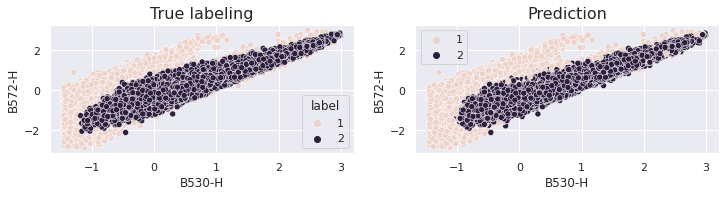

number of real cells: 8881, and number of predicted cells: 8910
[(2, 8881), (1, 4543)]
[(2, 8910), (1, 4514)]


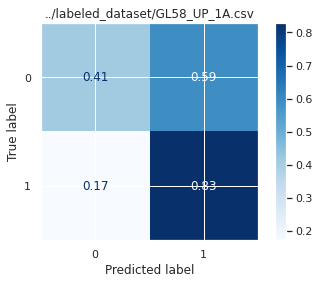

Accuracy: 0.577
Balanced Accuracy: 0.619
F1: 0.537
AUC: 0.619


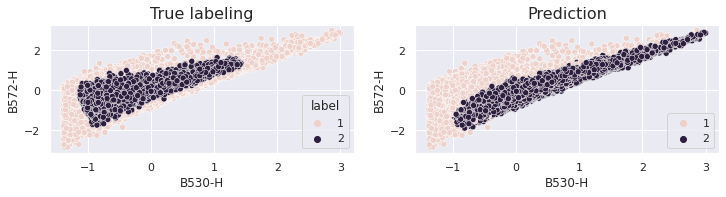

number of real cells: 4125, and number of predicted cells: 7066
[(1, 6171), (2, 4125)]
[(2, 7066), (1, 3230)]


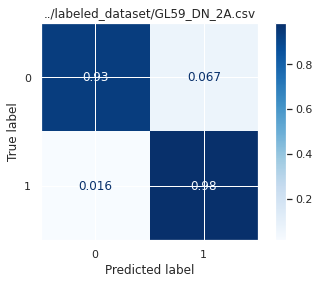

Accuracy: 0.967
Balanced Accuracy: 0.959
F1: 0.950
AUC: 0.959


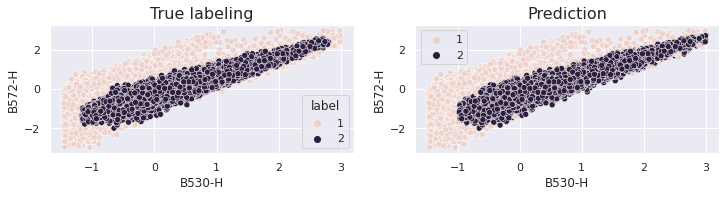

number of real cells: 9657, and number of predicted cells: 9845
[(2, 9657), (1, 5033)]
[(2, 9845), (1, 4845)]


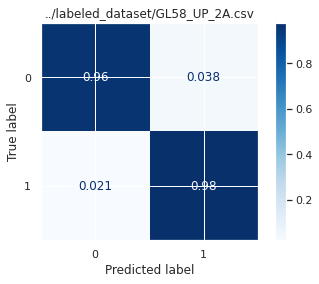

Accuracy: 0.973
Balanced Accuracy: 0.971
F1: 0.962
AUC: 0.971


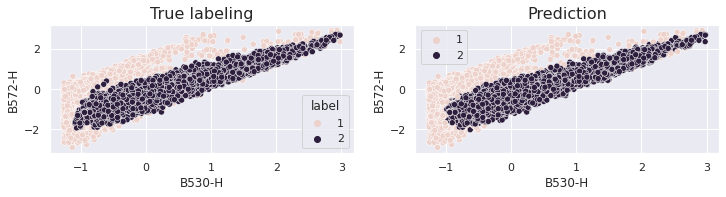

number of real cells: 4441, and number of predicted cells: 4439
[(2, 4441), (1, 2403)]
[(2, 4439), (1, 2405)]


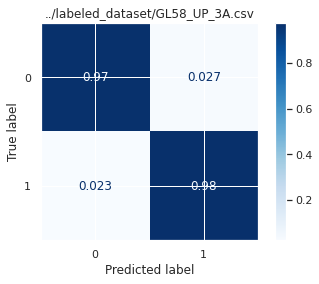

Accuracy: 0.975
Balanced Accuracy: 0.975
F1: 0.961
AUC: 0.975


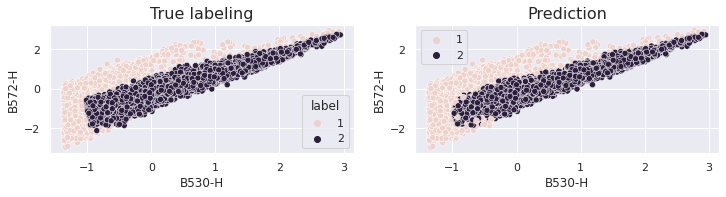

number of real cells: 5448, and number of predicted cells: 5389
[(2, 5448), (1, 2523)]
[(2, 5389), (1, 2582)]


In [13]:
for file in test_files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    plt.show()
    show_result(X_file,y_file,y_pred_file,label_cell=2)
    

# SVM

In [14]:
model = svm.SVC(max_iter=-1,kernel='rbf',C=1,gamma='scale', random_state=0)

results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='balanced_accuracy')
print("Balanced Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='f1')
print("F1: %.3f (%.3f)" % (results.mean(), results.std()))
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold_cv, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

# Example for a training-test split
model = svm.SVC(max_iter=-1,kernel='rbf',C=1,gamma='scale', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: %.3f" % (metrics.balanced_accuracy_score(y_test, y_pred)))
print("F1: %.3f" % (metrics.f1_score(y_test, y_pred)))
print("AUC: %.3f" % (metrics.roc_auc_score(y_test, y_pred)))

Accuracy: 0.920 (0.009)
Balanced Accuracy: 0.911 (0.009)
F1: 0.901 (0.011)
AUC: 0.969 (0.005)
Accuracy: 0.919
Balanced Accuracy: 0.911
F1: 0.900
AUC: 0.911


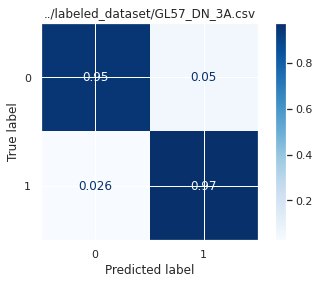

Accuracy: 0.966
Balanced Accuracy: 0.962
F1: 0.950
AUC: 0.962


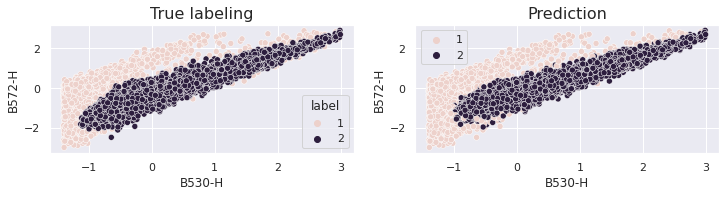

number of real cells: 5267, and number of predicted cells: 5265
[(2, 5267), (1, 2697)]
[(2, 5265), (1, 2699)]


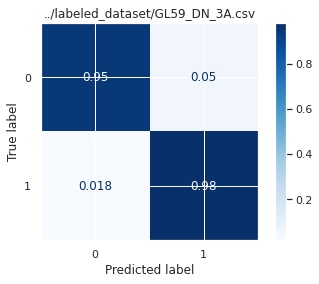

Accuracy: 0.971
Balanced Accuracy: 0.966
F1: 0.957
AUC: 0.966


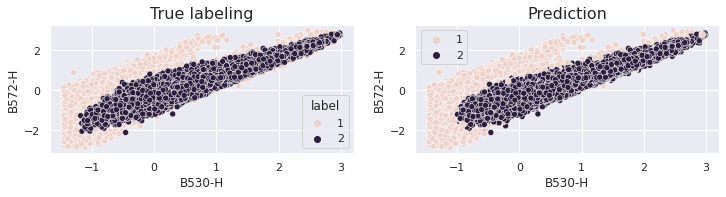

number of real cells: 8881, and number of predicted cells: 8947
[(2, 8881), (1, 4543)]
[(2, 8947), (1, 4477)]


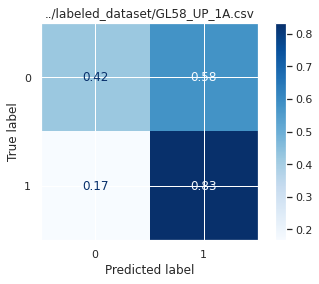

Accuracy: 0.586
Balanced Accuracy: 0.627
F1: 0.549
AUC: 0.627


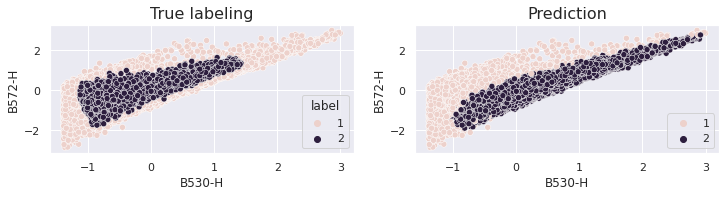

number of real cells: 4125, and number of predicted cells: 7012
[(1, 6171), (2, 4125)]
[(2, 7012), (1, 3284)]


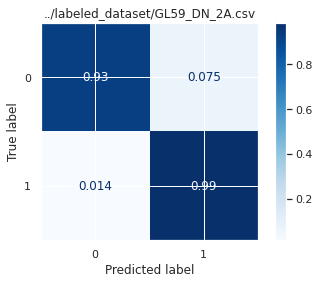

Accuracy: 0.965
Balanced Accuracy: 0.956
F1: 0.948
AUC: 0.956


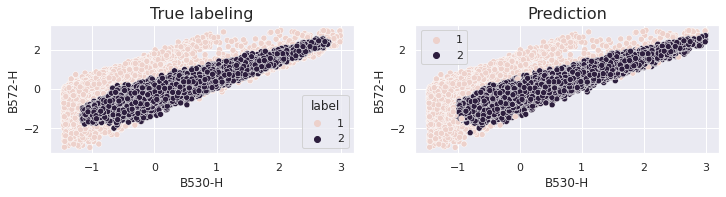

number of real cells: 9657, and number of predicted cells: 9895
[(2, 9657), (1, 5033)]
[(2, 9895), (1, 4795)]


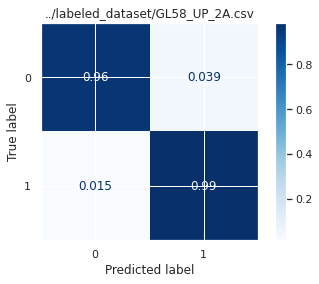

Accuracy: 0.977
Balanced Accuracy: 0.973
F1: 0.967
AUC: 0.973


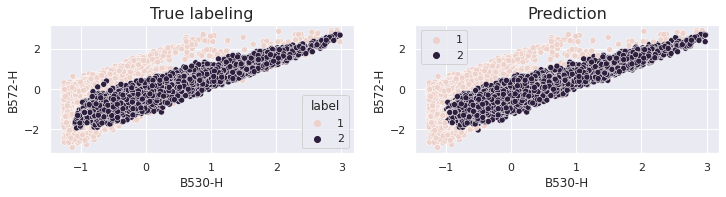

number of real cells: 4441, and number of predicted cells: 4468
[(2, 4441), (1, 2403)]
[(2, 4468), (1, 2376)]


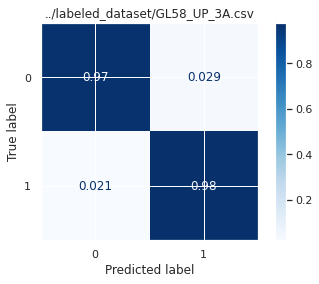

Accuracy: 0.976
Balanced Accuracy: 0.975
F1: 0.962
AUC: 0.975


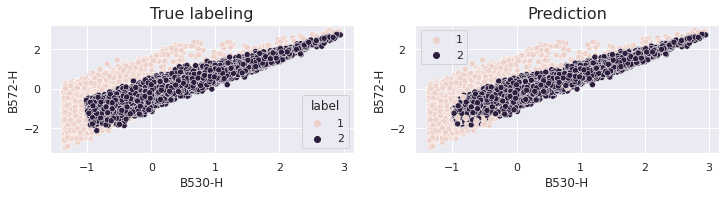

number of real cells: 5448, and number of predicted cells: 5405
[(2, 5448), (1, 2523)]
[(2, 5405), (1, 2566)]


In [15]:
for file in test_files:
    
    X_file,y_file = preprocess(file,columns)

    y_pred_file = model.predict(X_file)
    disp = metrics.plot_confusion_matrix(model, X_file, y_file, display_labels=np.arange(0, 2), cmap=plt.cm.Blues, normalize='true');
    disp.ax_.set_title(file)
    plt.show()
    show_result(X_file,y_file,y_pred_file,label_cell=2)

### test on the unlabeled file

In [23]:
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
#model = svm.SVC(max_iter=-1,kernel='rbf',C=1,gamma='scale', random_state=0)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [25]:
file = 'GL8_UP_3B.fcs'
folder='/../unlabeled_data/'
columns=['B530-H', 'B675-H','B572-H','Width']

X = preprocess_unlabeled(file,columns)

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

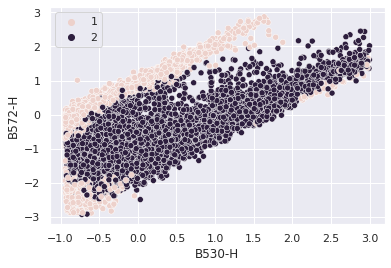

In [26]:
y_pred = model.predict(X)
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y_pred)

In [27]:
collections.Counter(y_pred).most_common()

[(2, 5291), (1, 5048)]

### save a supervised model for reusability

In [21]:
# save the model
dump(model, open('model.pkl', 'wb'))
# save the scaler if you want to
#dump(scaler, open('scaler.pkl', 'wb'))

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

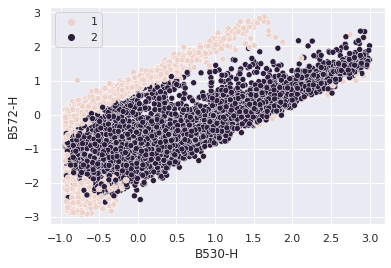

In [22]:
file = 'GL8_UP_3B.fcs'
folder='/../unlabeled_data/'
columns=['B530-H', 'B675-H','B572-H','Width']

X = preprocess_unlabeled(file,columns)


# load the model
model = load(open('model.pkl', 'rb'))


y_pred = model.predict(X)
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y_pred)